---
# **Python & Plataformas de Trading** 
---
### *Disclaimer:*
Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.<br/>
<br/>


---

## 1. Bibliotecas

In [1]:
# Instale a biblioteca do Metatrader após ter concluído a configuração junto a sua corretora
!pip install MetaTrader5

In [2]:
!pip install plotly

In [1]:
# Análise e manipulação de dados
import numpy as np
import pandas as pd

In [10]:
# Análises gráficas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
# Dados séries temporais
from datetime import datetime
import time
import pytz

In [11]:
# Integração com MetaTrader 5
import MetaTrader5 as mt5

## 2. Estrutura básica do MetaTrader 5 (MT5) usando Python

### 2.1. Integração do MT5 ao Python

In [5]:
# Iniciar o MT5 (se OK aparecerá True)
mt5.initialize()

True

In [8]:
#Número de simbolos ativos no meu MT5

mt5.symbols_total()

66685

In [9]:
# Obter todos os símbolos
symbols= mt5.symbols_get()
print('Total símbolos: ', len(symbols))

Total símbolos:  66685


In [10]:
# Exibir o total de símbolos que contém "PETR" (para não extrapolar o output)
# Imprimir os 10 primeiros
PETR_symbols=mt5.symbols_get("*PETR*")

print('Total símbolos contendo "PETR": ', len(PETR_symbols))

for i in PETR_symbols[0:10]:
    print(i.name)

Total símbolos contendo "PETR":  4110
PETRA140
PETRA150
PETRA64
PETRB48
PETRB66
PETRC35
PETRC36
PETRA162
PETRA164
PETRA170


### 2.2. Configurar os ativos desejados

In [11]:
# Incluir o símbolo desejado na janela "Observação do Mercado" (MarketWatch) do MT5
# Note que o ativo aparecerá dentre os demais, caso não estivesse antes

ativo = "VALE3"
selected=mt5.symbol_select(ativo,True)
if not selected:
    print(ativo,"não localizado")

In [12]:
# Testando com um ativo que não existe

ativo_errado = "VALE2"
selected=mt5.symbol_select(ativo_errado,True)
if not selected:
    print(ativo_errado,"não localizado")

VALE2 não localizado


In [13]:
# Obter as propriedades do ativo desejado em forma de lista
symbol_info = mt5.symbol_info(ativo)

if symbol_info!=None:
    print("Informações gerais de '"+ativo+"': ")
    symbol_info_dict= mt5.symbol_info(ativo)._asdict()
    for prop in symbol_info_dict:
        print(" {}={}".format(prop, symbol_info_dict[prop]))


Informações gerais de 'VALE3': 
 custom=False
 chart_mode=1
 select=True
 visible=True
 session_deals=15820
 session_buy_orders=0
 session_sell_orders=0
 volume=100
 volumehigh=250000
 volumelow=100
 time=1653478390
 digits=2
 spread=3
 spread_float=True
 ticks_bookdepth=32
 trade_calc_mode=32
 trade_mode=4
 start_time=0
 expiration_time=0
 trade_stops_level=0
 trade_freeze_level=0
 trade_exemode=3
 swap_mode=0
 swap_rollover3days=3
 margin_hedged_use_leg=False
 expiration_mode=2
 filling_mode=3
 order_mode=127
 order_gtc_mode=0
 option_mode=0
 option_right=0
 bid=84.01
 bidhigh=84.29
 bidlow=83.41
 ask=84.04
 askhigh=84.3
 asklow=83.49
 last=84.05
 lasthigh=84.3
 lastlow=83.41
 volume_real=100.0
 volumehigh_real=250000.0
 volumelow_real=100.0
 option_strike=0.0
 point=0.01
 trade_tick_value=0.01
 trade_tick_value_profit=0.01
 trade_tick_value_loss=0.01
 trade_tick_size=0.01
 trade_contract_size=1.0
 trade_accrued_interest=0.0
 trade_face_value=0.0
 trade_liquidity_rate=0.0
 volume_min

In [14]:
# Informações do último tick do ativo

lasttick=mt5.symbol_info_tick(ativo)
print("Mostrar as informações do último tick '"+ativo+"':")
symbol_info_tick_dict = mt5.symbol_info_tick(ativo)._asdict()
for prop in symbol_info_tick_dict:
    print("{}={}".format(prop, symbol_info_tick_dict[prop]))

Mostrar as informações do último tick 'VALE3':
time=1653478532
bid=84.1
ask=84.12
last=84.1
volume=100
time_msc=1653478532041
flags=0
volume_real=100.0


In [16]:
#criar uma rotina onde faremos loop para obtermos 3x os dados do book de ofertas
#vamos realizar uma pausa de 5 segundos entre cada acesso e encerrar a rotina

ativo = 'PETR3'
#Receber notificações sobre a mudança no book de ofertas
mt5.market_book_add(ativo)

# Criar um loop para obtermos 3 vezes os dados do book de ofertas do ativo.
# Configuramos uma pausa de 10 segundos entre cada acesso ao book.
# Por fim, encerramos o acesso ao book daquele ativo

if mt5.market_book_add(ativo):
     # Obtemos 3 vezes em um loop os dados do livro de ofertas
    for i in range(4):
        # Obtemos o conteúdo do book de ofertas (Depth of Market)
        items = mt5.market_book_get(ativo)
         # Exibimos cada solicitação separadamente para maior clareza
        if items:
            for it in items:
                print(it._asdict())
        # Vamos fazer uma pausa de 10 segundos antes da próxima solicitação de dados do book de ofertas
        # Inserir uma linha para separar cada loop
                
        print("-----------------------")
        time.sleep(5)
    # Cancelamos a subscrição de atualizações no book de ofertas (Depth of Market)    
    mt5.market_book_release(ativo)
# Caso o ativo não seja encontrado ou ocorra algum outro tipo de erro    
else:
    print("Falha ao acessar o book de ofertas de ''", ativo,"'', error code=", mt5.last_error())

{'type': 1, 'price': 35.06, 'volume': 7400, 'volume_dbl': 7400.0}
{'type': 1, 'price': 35.05, 'volume': 4100, 'volume_dbl': 4100.0}
{'type': 1, 'price': 35.04, 'volume': 15500, 'volume_dbl': 15500.0}
{'type': 1, 'price': 35.03, 'volume': 9800, 'volume_dbl': 9800.0}
{'type': 1, 'price': 35.02, 'volume': 12900, 'volume_dbl': 12900.0}
{'type': 1, 'price': 35.01, 'volume': 10900, 'volume_dbl': 10900.0}
{'type': 1, 'price': 35.0, 'volume': 22700, 'volume_dbl': 22700.0}
{'type': 1, 'price': 34.99, 'volume': 9800, 'volume_dbl': 9800.0}
{'type': 1, 'price': 34.98, 'volume': 20400, 'volume_dbl': 20400.0}
{'type': 1, 'price': 34.97, 'volume': 15900, 'volume_dbl': 15900.0}
{'type': 1, 'price': 34.96, 'volume': 14500, 'volume_dbl': 14500.0}
{'type': 1, 'price': 34.95, 'volume': 13600, 'volume_dbl': 13600.0}
{'type': 1, 'price': 34.94, 'volume': 17000, 'volume_dbl': 17000.0}
{'type': 1, 'price': 34.93, 'volume': 11600, 'volume_dbl': 11600.0}
{'type': 1, 'price': 34.92, 'volume': 15800, 'volume_dbl'

### 2.3. Extrair dados cotações históricas

| Intervalo Tempo |	| Código MT5 |	|   |	| Intervalo Tempo |	| Código MT5 |
|---|	|---|	|---|	|---|	|---|
| 1 minuto|	|TIMEFRAME_M1 |	|   |	| 1 hora|	|TIMEFRAME_H1 |
| 2 minutos|	|TIMEFRAME_M2 |	|   |	| 2 horas|	|TIMEFRAME_H2 |
| 3 minutos|	|TIMEFRAME_M3 |	|   |	| 3 horas|	|TIMEFRAME_H3 |
| 4 minutos|	|TIMEFRAME_M4 |	|   |	| 4 horas|	|TIMEFRAME_H4 |
| 5 minutos|	|TIMEFRAME_M5 |	|   |	| 6 horas|	|TIMEFRAME_H6 |
| 6 minutos|	|TIMEFRAME_M6 |	|   |	| 8 horas|	|TIMEFRAME_H8 |
| 10 minutos|	|TIMEFRAME_M10 |	|   |	| 12 horas|	|TIMEFRAME_H12 |
| 12 minutos|	|TIMEFRAME_M12 |	|   |	| 1 dia|	|TIMEFRAME_D1 |
| 15 minutos|	|TIMEFRAME_M15 |	|   |	| 1 semana|	|TIMEFRAME_W1 |
| 20 minutos|	|TIMEFRAME_M20 |	|   |	| 1 mês |	|TIMEFRAME_MN1 |
| 30 minutos|	|TIMEFRAME_M30 |	|   |	||	||

É preciso ajustar o fuso horário dos dados do MT5 (estão em UTC - Coordinated Universal Time)<br/>
O horário de Brasília = UTC - 3h. No caso da lib pytz, "America/Sao_Paulo"<br/>
Primeiro listamos os fusos 'mais comuns'

In [17]:
pytz.common_timezones[0:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [18]:
#Horário Oficial de Brasília

In [13]:
timezone = pytz.timezone("America/Sao_Paulo")

In [21]:
#Definir data inicial e data final

data_inicio = datetime(2022,1,1, tzinfo=timezone)
data_fim = datetime(2022,2,19, tzinfo=timezone)


In [22]:
#Informar o ativo, o timeframe, data incial e data final

cotacoes = mt5.copy_rates_range(ativo, mt5.TIMEFRAME_M5, data_inicio, data_fim)

Obs: Existem outras duas formas de obtenção de cotações históricas por timeframes e por ticks de negociação:<br/>
- copy_rates_from<br/>
- copy_rates_from_pos<br/>
- copy_ticks_from<br/>
- copy_ticks_range<br/>

Entretanto é preciso determinar o número de barras inicial/numero de barras "para trás"... (acredito tornam essas funções menos funcionais, mas podem ser encontradas na documentação MQL5)<br/>
São mais interessantes quanto estivermos criando robôs

In [23]:
# Chamarmos o objeto cotações
# O formato está em array é difícil de se manipular

cotacoes[0:10]

array([(1641204000, 30.84, 30.98, 30.76, 30.85, 332, 1, 115800),
       (1641204300, 30.87, 30.98, 30.83, 30.95, 377, 1, 103100),
       (1641204600, 30.96, 31.11, 30.95, 31.11, 382, 1,  88400),
       (1641204900, 31.09, 31.29, 31.09, 31.27, 296, 1, 105200),
       (1641205200, 31.27, 31.42, 31.25, 31.38, 294, 1, 153100),
       (1641205500, 31.38, 31.44, 31.33, 31.35, 291, 1, 119400),
       (1641205800, 31.36, 31.37, 31.34, 31.37, 520, 1, 221700),
       (1641206100, 31.35, 31.37, 31.21, 31.24, 582, 1, 260700),
       (1641206400, 31.24, 31.32, 31.15, 31.2 , 621, 1, 271000),
       (1641206700, 31.18, 31.2 , 31.13, 31.18, 148, 1,  40100)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [24]:
#Transformar o array em dataframe

cotacoes_df = pd.DataFrame(cotacoes)
cotacoes_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1641204000,30.84,30.98,30.76,30.85,332,1,115800
1,1641204300,30.87,30.98,30.83,30.95,377,1,103100
2,1641204600,30.96,31.11,30.95,31.11,382,1,88400
3,1641204900,31.09,31.29,31.09,31.27,296,1,105200
4,1641205200,31.27,31.42,31.25,31.38,294,1,153100


In [27]:
#Trasformar a coluna time em data hora padrão

cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-01-03 10:00:00,30.84,30.98,30.76,30.85,332,1,115800
1,2022-01-03 10:05:00,30.87,30.98,30.83,30.95,377,1,103100
2,2022-01-03 10:10:00,30.96,31.11,30.95,31.11,382,1,88400
3,2022-01-03 10:15:00,31.09,31.29,31.09,31.27,296,1,105200
4,2022-01-03 10:20:00,31.27,31.42,31.25,31.38,294,1,153100
...,...,...,...,...,...,...,...,...
3307,2022-02-18 17:30:00,35.88,35.89,35.82,35.88,592,1,199000
3308,2022-02-18 17:35:00,35.87,35.91,35.82,35.85,633,1,245500
3309,2022-02-18 17:40:00,35.84,35.93,35.84,35.90,256,1,92300
3310,2022-02-18 17:45:00,35.89,35.94,35.87,35.93,240,1,136900


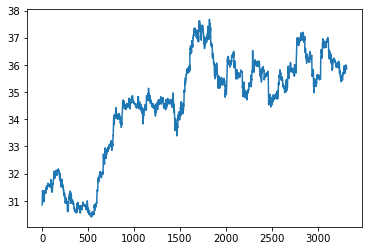

In [28]:
# Plotar os preços de fechamento do dataframe
# O eixo x não aparece como data

cotacoes_df.close.plot();

In [29]:
#Transformar o indice em data

cotacoes_df.index = cotacoes_df['time']
cotacoes_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2022-01-03 10:00:00,2022-01-03 10:00:00,30.84,30.98,30.76,30.85,332,1,115800
2022-01-03 10:05:00,2022-01-03 10:05:00,30.87,30.98,30.83,30.95,377,1,103100
2022-01-03 10:10:00,2022-01-03 10:10:00,30.96,31.11,30.95,31.11,382,1,88400
2022-01-03 10:15:00,2022-01-03 10:15:00,31.09,31.29,31.09,31.27,296,1,105200
2022-01-03 10:20:00,2022-01-03 10:20:00,31.27,31.42,31.25,31.38,294,1,153100


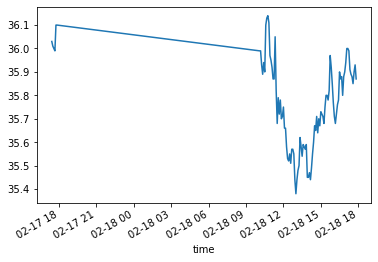

In [31]:
# Observar as horas entre o fechamento de um dia e abertura de outro dia
cotacoes_df[-100:].close.plot();

O uso de bibliotecas mais potentes para vizualização gráfica.<br/>
Usando a Plotly, produziremos um gráfico de candlesticks, filtrando finais de semana, horas sem pregão para determinado ativo e feriados (filtros específicos podem ser feitos separadamente)<br/>
Note que o gráfico é interativo

In [37]:
fig_cotacoes = go.Figure(data=[go.Candlestick(name='PETR3', x= cotacoes_df.index, open=cotacoes_df['open'], high=cotacoes_df['high'], low=cotacoes_df['low'], close=cotacoes_df['close'])])

fig_cotacoes.update_xaxes(title_text='<b> Data',
                          rangebreaks=[
                              dict(bounds=["sat", "mon"]), #não mostra finais de semana
                              dict(bounds=[18, 10], pattern="hour"), #não mostra horas de pregão fechado
                              dict(values=['2021-12-25', '2022-01-01', '2022-01-02'])#recesso de natal e ano novo
    
])

fig_cotacoes.update_yaxes(title_text="<b> Preço do Ativo R$")
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico Candlestick', template='simple_white')
fig_cotacoes.show()

### 2.4 Checar posição atual e ordens pendentes

In [39]:
#Checar a moeda configurada na conta

account_currency = mt5.account_info().currency
print("Moeda configurada:", account_currency)

Moeda configurada: BRL


In [40]:
#Verificar a presença de ordens pendentes 

orders = mt5.orders_total()
if orders >0:
    print("Total de ordens=", orders)
else:
    print("Nenhuma ordem encontrada")

Nenhuma ordem encontrada


In [41]:
#Detalhar uma ordem relativa a um ativo específico

ativo ="MGLU3"
orders=mt5.orders_get(symbol=ativo)

if orders is None:
    print("Nenhuma ordem encontrada para", ativo, "error_code={}".format(mt5.last_error()))
else:
    print("Total de ordens=",len(orders))
    #exibir todas as ordens ativas
    for order in orders:
        print(order)
print()

Total de ordens= 0



### 2.5 Configurar uma ordem de Compra a Mercado

In [83]:
symbol = "VALE3"
mt5.symbol_select(symbol,True)
symbol_info = mt5.symbol_info(symbol)
symbol_info

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=51730, session_buy_orders=0, session_sell_orders=0, volume=800, volumehigh=954300, volumelow=100, time=1653674393, digits=2, spread=1, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=85.83, bidhigh=85.87, bidlow=84.7, ask=85.84, askhigh=85.88, asklow=84.74, last=85.84, lasthigh=85.88, lastlow=84.7, volume_real=800.0, volumehigh_real=954300.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0, volume_max=499

**Configurar:**<br/>
Quantidade = número de ações/contrato (float, colocar  ".0" );<br/>
Pontos = tick mínimo do ativo (ex., para ações usualmente R\$ 0.01, WINFUT 5pts);<br/>
Preco = preço de compra (colocamos no ask do ativo para executar a mercado);<br/>
Desvio_toler = Desvio máximo aceitável em relação ao preço solicitado (em pontos). Também é conhecido como 'offset' de ordem

In [84]:
qtd = 500.0 #Sempre colocar numero de acoes/contrato(float, coloar ".0")
tick_min = mt5.symbol_info(symbol).point
preco = mt5.symbol_info_tick(symbol).ask
desvio_toler = 30

ordem_compra = {
    "action": mt5.TRADE_ACTION_DEAL, #tipo de ordem (a mercado)
    "symbol": symbol, #ativo
    "volume": 100.0, #quantidade de ações
    "type": mt5.ORDER_TYPE_BUY, #compra a mercado
    "price": preco, #preco de compra, aqui definido como ask do ativo (melhor preço de venda do book)
    "sl": preco - 100 * tick_min, #stop loss (preço de entrada - 100 ticks mínimos)
    "tp": preco + 30 * tick_min, #take profit (preco de entrada + 30 ticks minimos)
    "deviation": desvio_toler, #ordem offset
    "magic": 1, #identificador da operacao (opicional)
    "comment": "Primeiros Trades Python", #comentario para ordem (opcional)
    "type_time": mt5.ORDER_TIME_DAY, #validade da ordem
    "type_filling": mt5.ORDER_FILLING_RETURN, #ordem pode ser executada parcialmente e manter residual, não sera realizada nova entrada
    
}


In [85]:
mt5.order_check(ordem_compra)

OrderCheckResult(retcode=0, balance=94305.0, equity=94305.0, profit=0.0, margin=0.0, margin_free=94305.0, margin_level=0.0, comment='Done', request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=85.84, stoplimit=0.0, sl=84.84, tp=86.14, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros Trades Python', position=0, position_by=0))

In [86]:
#Checar estrutura da ordem

result_compra = mt5.order_check(ordem_compra)
print("Estrutura da ordem nº", ordem_compra['magic'], '"'+ordem_compra['comment']+'"')
result_dict=result_compra._asdict()
for field in result_dict.keys():
    print(" {}={}".format(field,result_dict[field]))
    #se esta for uma estrutura de solicitação de negociação, conseguimos exibir também elemento a elemento
    if field=="ordem_compra":
        traderesquest_dict=result_dict[field]._asdict()
        for tradereq_filed in traderequest_dict:
            print("     traderequest: {}={}".format(tradereq_filed, traderrequest_dict[tradereq_filed]))

Estrutura da ordem nº 1 "Primeiros Trades Python"
 retcode=0
 balance=94305.0
 equity=94305.0
 profit=0.0
 margin=0.0
 margin_free=94305.0
 margin_level=0.0
 comment=Done
 request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=85.84, stoplimit=0.0, sl=84.84, tp=86.14, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros Trades Python', position=0, position_by=0)


### 2.6 Enviar uma ordem de compra (configurada anteriormente) ao MT5

In [87]:
#Enviar a solicitação de negociação

result_compra = mt5.order_send(ordem_compra)

In [88]:
# Verificar o resultado da execução

print("1. Ordem enviada para {}, {} ações a {} com tolerância de {} pontos".format(symbol,qtd,preco,desvio_toler));

#Se a ordem não pode ser enviada, informar os detalhes

if result_compra.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. ENVIO DE ORDEM FALHOU!, retcode={}".format(result_compra.retcode))
    # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_dict=result._asdict()
    for field in result_dict.keys():
        print(" {}={}".format(field, result_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_compra":
            traderesquest_dict=result_dict[fiedl]._asdict()
            for tradereq_filed in tradereques_dict:
                print("     traderequest: {}={}".format(tradereq_filed, traderequest_dict[tradereq_filed]))
    print("CANCELAR E FECHAR")
## Se ordem foi executada corretamenteda informar os detalhes    
else: 
    print("2. ENVIO DE ORDEM EXECUTADO COM SUCESSO!, ", result_compra)
    print("    POSITION_TICKET={}".format(result_compra.order))

1. Ordem enviada para VALE3, 500.0 ações a 85.84 com tolerância de 30 pontos
2. ENVIO DE ORDEM EXECUTADO COM SUCESSO!,  OrderSendResult(retcode=10009, deal=907381094, order=1198651556, volume=100.0, price=85.84, bid=85.83, ask=85.84, comment='Request executed', request_id=5, retcode_external=0, request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=85.84, stoplimit=0.0, sl=84.84, tp=86.14, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros Trades Python', position=0, position_by=0))
    POSITION_TICKET=1198651556


In [73]:
#Crio os parâmetros da ordem e a ordem

symbol_fake = "PETR2"
mt5.symbol_select(symbol,True)
symbol_info = mt5.symbol_info(symbol)

ordem_fake = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol_fake,
    "volume": qtd,
    "type": mt5.ORDER_TYPE_BUY,
    "price": preco,
    "sl": preco - 100 * tick_min,
    "tp": preco + 100 * tick_min,
    "deviation": 0,
    "magic": 1,
    "comment": "Primeiros trades Python",
    "type_time": mt5.ORDER_TIME_DAY,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

result_fake = mt5.order_send(ordem_fake)

print("1. Ordem_enviada(): para {}, {} ações a {} com tolerancia de {} pontos".format(symbol_fake,qtd,preco,desvio_toler));

## Se ordem não pôde ser enviada, informar os detalhes
if result_fake.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. ENVIO DE ORDEM FALHOU !!!, retcode={}".format(result_fake.retcode))
   # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_fake_dict=result_fake._asdict()
    for field in result_fake_dict.keys():
        print("   {}={}".format(field,result_fake_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_fake":
            traderequest_dict=result_fake_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
    print("CANCELAR E FECHAR")

else:
    ## Se ordem foi executada corretamenteda informar os detalhes
    print("2. ENVIO DE ORDEM EXECUTADO COM SUCESSO !!!, ", result_fake)
    print("   POSITION_TICKET={}".format(result_fake.order))

1. Ordem_enviada(): para PETR2, 500.0 ações a 84.3 com tolerancia de 30 pontos
2. ENVIO DE ORDEM FALHOU !!!, retcode=10013
   retcode=10013
   deal=0
   order=0
   volume=0.0
   price=0.0
   bid=0.0
   ask=0.0
   comment=Invalid request
   request_id=0
   retcode_external=0
   request=TradeRequest(action=1, magic=1, order=0, symbol='PETR2', volume=500.0, price=84.3, stoplimit=0.0, sl=83.3, tp=85.3, deviation=0, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0)
CANCELAR E FECHAR


### 2.7 Verificar as posições abertas

In [90]:
# Total de posições abertas
positions_total = mt5.positions_total()

if positions_total > 0:
    print("Total de posições =", positions_total)
    
else:
    print("Nenhuma posição encontrada")

Total de posições = 1


In [ ]:
# Posição aberta para um determinado ativo

ativo_positions=mt5.positions_get(group="*ITUB4*")

if ativo_positions==None:
    print("Nenhuma posição para o ativo\"ITUB4\", error code={}".format(mt5.last_error()))
elif len(ativo_positions)>0:
    print("Posições para o ativo \"ITUB4\") = {}".format(len(ativo_positions)))
    # exibimos essas posições como uma tabela usando pandas.DataFrame
    df=pd.DataFrame(list(ativo_positions),columns=ativo_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis=1, inplace=True)
    print(df)

### 2.8 Ordem para encerrar a compra executada anteriormente

In [97]:
# Acessar o número da ordem executada anteriormente
# Relebrando a variável ==> result = mt5.order_check(ordem_compra)

position_id=result_compra.order
position_id

1198651556

In [92]:
#Detalhar a ordem de compra executada

result_compra.request

TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=85.84, stoplimit=0.0, sl=84.84, tp=86.14, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros Trades Python', position=0, position_by=0)

In [102]:
#Construir os parametros da ordem de venda

symbol = 'VALE3'
qtd = 500.
position_id = result_compra.order
preco_sell=mt5.symbol_info_tick(symbol).bid
desvio_toler = 20

ordem_fechamento={
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": qtd,
    "type": mt5.ORDER_TYPE_SELL,
    "position": position_id,
    "price": preco_sell,
    "deviation": desvio_toler,
    "magic": 1,
    "comment": "Primeiros Trades em Python",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN
}
# Executar ordem estabelecida acima
result_fechamento = mt5.order_send(ordem_fechamento)

In [103]:
#Verificar o resultado da execução

print("3. Fechamento posição #{}: venda {}  {} açoes a {} com tolerancia {} pontos".format(position_id, symbol, qtd, preco_sell, desvio_toler));

if result_fechamento.retcode != mt5.TRADE_RETCODE_DONE:
    print("4. FECHAMENTO DE ORDEM FALHOU, retcode={}".format(result_fechamento.retcode))
    print("  result", result_fechamento)
else: 
    print('4. POSIÇÃO ENCERRADA COM SUCESSO referente a ordem #{} closed, {}'.format(position_id, result_fechamento))
    # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_dict=result_fechamento._asdict()
    for field in result_dict.keys():
        print("  {}={}".format(field, result_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_fechamento":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("     traderequest: {}={}".format(tradereq_filed, traderequest_dict[tradereq_filed]))

3. Fechamento posição #1198651556: venda VALE3  500.0 açoes a 85.83 com tolerancia 20 pontos
4. FECHAMENTO DE ORDEM FALHOU, retcode=10038
  result OrderSendResult(retcode=10038, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Volume to be closed exceeds the position volume', request_id=6, retcode_external=0, request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=500.0, price=85.83, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=2, type_time=0, expiration=0, comment='Primeiros Trades em Python', position=1198651556, position_by=0))


### 2.9 Histórico de ordens e trades

In [104]:
#historico geral de ordens

from_date=datetime(2022,1,1)
to_date=datetime.now()

history_orders = mt5.history_orders_total(from_date, datetime.now())

if history_orders>0:
    print("Histórico de ordens de", from_date, "a", to_date, "=",history_orders, "ordens")
else:
    print("Nenhum histórico encontrado para esse período")

Histórico de ordens de 2022-01-01 00:00:00 a 2022-05-27 19:01:18.146790 = 55 ordens


In [105]:
#Histórico de ordens para um ativo específco

history_orders = mt5.history_orders_get(from_date, to_date, group="*VALE3*")

if history_orders==None:
    print("Nenhum histórico encontrado para esse período")
elif len(history_orders)>0:
    print("history_orders_get({}, {}, group=\"*VALE3*\")={}".format(from_date, to_date,len(history_orders)))
print()

#Exibir essas posições como uma tabela usando pd.DataFrame()

df = pd.DataFrame(list(history_orders), columns=history_orders[0]._asdict().keys())

# Caso queira excluir alguma coluna que achar desnacessária
# df.drop(['time_expiration','type_time','state','position_by_id','reason','volume_current','price_stoplimit','sl','tp'], axis=1, inplace=True)

df['time_setup'] = pd.to_datetime(df['time_setup'], unit='s')
#df['time_setup_msc'] = pd.to_datetime(df['time_setup_msc'], unit='s')
df['time_done'] = pd.to_datetime(df['time_done'], unit='s')
print(df)



history_orders_get(2022-01-01 00:00:00, 2022-05-27 19:01:18.146790, group="*VALE3*")=8

       ticket          time_setup  time_setup_msc           time_done  \
0  1144977132 2022-04-07 16:00:43   1649347243876 2022-04-07 16:00:43   
1  1145449618 2022-04-08 10:40:00   1649414400929 2022-04-08 10:40:01   
2  1197330227 2022-05-26 15:38:36   1653579516082 2022-05-26 15:38:36   
3  1197343045 2022-05-26 15:48:42   1653580122792 2022-05-26 15:48:42   
4  1197348572 2022-05-26 15:52:05   1653580325656 2022-05-26 15:52:05   
5  1197359776 2022-05-26 16:00:27   1653580827151 2022-05-26 16:00:27   
6  1197392263 2022-05-26 16:29:01   1653582541116 2022-05-26 16:29:01   
7  1198651556 2022-05-27 18:23:16   1653675796851 2022-05-27 18:23:16   

   time_done_msc  time_expiration  type  type_time  type_filling  state  ...  \
0  1649347243876                0     0          1             2      4  ...   
1  1649414401620                0     1          0             1      4  ...   
2  16535795160

In [107]:
#Histórico de trades para ativo específico

history_deals = mt5.history_deals_get(from_date,to_date,group="*VALE3*")

if history_deals==None:
    print("Nenhum historico de trades encontrado")
elif len(history_orders) > 0:
    print("history_deals_get({},{}, group=\"*VALE3*\")={}".format(from_date, to_date, len(history_deals)))
print()

# Exibimos essas posições como uma tabela usando pandas.DataFrame
df=pd.DataFrame(list(history_deals), columns=history_deals[0]._asdict().keys())

# Caso queira excluir alguma coluna que achar desnacessária
# df.drop(['time_expiration','type_time','state','position_by_id','reason','volume_current','price_stoplimit','sl','tp'], axis=1, inplace=True)

df['time'] =pd.to_datetime(df['time'], unit='s')
print(df)

history_deals_get(2022-01-01 00:00:00,2022-05-27 19:01:18.146790, group="*VALE3*")=8

      ticket       order                time       time_msc  type  entry  \
0  868716930  1144977132 2022-04-07 16:00:43  1649347243876     0      0   
1  869047477  1145449618 2022-04-08 10:40:01  1649414401620     1      1   
2  906502383  1197330227 2022-05-26 15:38:36  1653579516082     0      0   
3  906509450  1197343045 2022-05-26 15:48:42  1653580122792     0      0   
4  906513130  1197348572 2022-05-26 15:52:05  1653580325656     0      0   
5  906519000  1197359776 2022-05-26 16:00:27  1653580827151     0      0   
6  906537599  1197392263 2022-05-26 16:29:01  1653582541116     1      1   
7  907381094  1198651556 2022-05-27 18:23:16  1653675796851     0      0   

   magic  position_id  reason  volume  price  commission  swap  profit  fee  \
0      1   1144977132       3   100.0  97.39         0.0   0.0     0.0  0.0   
1      1   1144977132       4   100.0  96.40         0.0   0.0   -99.0 

In [ ]:
df.to_excel("Output_trades.xlsx", sheet_name='Ativo1')

In [ ]:
## https://www.mql5.com/pt/docs/integration/python_metatrader5/mt5ordercheck_py

## 3. Trade automatizado (criando robôs no MT5 com Python)

In [ ]:
# Estabelecer a conexão ao MetaTrader 5

mt5.initialize()

# Definimos o fuso horário da B3 - Brasil

timezone = pytz.timezone("America/Sao_Paulo")

In [ ]:
# Definir data inicial e data e hora atual, neste formato
# Observe que a variável data_hora_atual possui data, hora, minutos, segundos e microsegundos

data_inicio = datetime(2022,1,1, tzinfo=timezone)
data_hora_atual = datetime.today()
data_hora_atual

Extrair a cotação em tempo real de um ativo (ex., WINJ22), executando em intervalos de 5 em 5 segundos.

Para não se tornar um loop infinito, vamos iniciar uma contagem do 0 e pedir que a cada extração ele adicione 1 a essa contagem.

O loop deverá ser executado até que a contagem chegue a 5.

In [15]:
import sys

In [119]:
count_cotacoes = 0

while count_cotacoes <5:
    ativo = mt5.symbol_info_tick('VALE3')
    print("\r" +str(ativo.last))
    sys.stdout.flush()
    count_cotacoes +=1
    time.sleep(5)

85.84
85.84
85.84
85.84
85.84


In [122]:
# Agora vamos gerar uma estrutura de dataframe em tempo real, extraindo a cotação e calculando um indicador (ex., MM 9 períodos) em um timeframe específico (ex., 1min)
symbol = 'VALE3'
cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio, datetime.today())
cotacoes_df = pd.DataFrame(cotacoes_ativo)
cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df.index = cotacoes_df['time']

In [123]:
cotacoes_df

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2022-01-03 10:09:00,2022-01-03 10:09:00,76.08,76.12,75.83,75.93,694,1,377100
2022-01-03 10:10:00,2022-01-03 10:10:00,75.94,76.22,75.87,76.19,440,1,99100
2022-01-03 10:11:00,2022-01-03 10:11:00,76.18,76.35,76.11,76.31,203,1,72600
2022-01-03 10:12:00,2022-01-03 10:12:00,76.31,76.39,76.29,76.31,203,1,57100
2022-01-03 10:13:00,2022-01-03 10:13:00,76.31,76.35,76.17,76.18,195,1,53000
...,...,...,...,...,...,...,...,...
2022-05-27 17:55:00,2022-05-27 17:55:00,85.82,85.83,85.82,85.82,3,1,600
2022-05-27 17:56:00,2022-05-27 17:56:00,85.84,85.84,85.84,85.84,1,1,1000
2022-05-27 17:57:00,2022-05-27 17:57:00,85.84,85.85,85.83,85.83,5,1,2200


In [124]:
#Calcular as médias móveis

MM_periodo_l = 9
MM_periodo_c = 3
MMA = cotacoes_df['close'].rolling(window=MM_periodo_l).mean()
MMA_3 = cotacoes_df['close'].rolling(window=MM_periodo_c).mean()
cotacoes_df['MMA_9p'] = MMA
cotacoes_df['MMA_3p'] = MMA_3
cotacoes_df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume,MMA_9p,MMA_3p
time,,,,,,,,,,
2022-05-27 17:55:00,2022-05-27 17:55:00,85.82,85.83,85.82,85.82,3,1,600,85.821111,85.816667
2022-05-27 17:56:00,2022-05-27 17:56:00,85.84,85.84,85.84,85.84,1,1,1000,85.826667,85.823333
2022-05-27 17:57:00,2022-05-27 17:57:00,85.84,85.85,85.83,85.83,5,1,2200,85.831111,85.830000
2022-05-27 17:58:00,2022-05-27 17:58:00,85.84,85.84,85.84,85.84,3,1,800,85.830000,85.836667
2022-05-27 17:59:00,2022-05-27 17:59:00,85.85,85.85,85.83,85.84,8,1,2900,85.830000,85.836667


In [125]:
#Plotar os ultimos 10 candles com as médias móveis

cotacoes_df2 = cotacoes_df[-10:]

fig_cotacoes = go.Figure(data=[go.Candlestick(name='VALE3', x=cotacoes_df2.index, open=cotacoes_df2['open'], high=cotacoes_df2['high'], low=cotacoes_df2['low'], close=cotacoes_df2['close'])])

fig_cotacoes.add_trace(go.Scatter(name='MMA_9p', x=cotacoes_df2.index, y=cotacoes_df2.MMA_9p, marker_color='blue'))
fig_cotacoes.add_trace(go.Scatter(name='MMA_3p', x=cotacoes_df2.index, y=cotacoes_df2.MMA_3p, marker_color='red'))
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico de Candlestick VALE3', template='simple_white')
fig_cotacoes.show()





Para aumentar a complexidade do código, incluindo a estrutura da ordem de compra. Dessa vez o output será o horário atual, o preço de fechamento do último candle, o valor da MM e se teriamos ou não um sinal de compra/venda

Nesse caso, assim que surgir um sinal de compra/venda finalizaremos a extração dos dados

In [49]:
contador_sinais = 0
posição = 0

while (contador_sinais < 10) and (posição==0):
    contador_sinais +=1
    print("---------------------------------------------")
    print("A hora atual é", datetime.today())
    
    symbol='PETR4'
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio, datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']
    
    #Calculo das médias móveis
    MM_periodo = 5
    MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
    cotacoes_df['MMA'] = MMA
    
    print("O preço de fechamento anterior havia sido de", cotacoes_df.close[-2], "e a MM estava em", cotacoes_df.MMA[-2])
    print("O preço de fechamento atual foi", cotacoes_df.close[-1], "e a MM está em", cotacoes_df.MMA[-1])
    
    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2])):
        print("Sinal de COMPRA!")
        posição = 1
        time.sleep(5)
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2])):
        print("Sinal de VENDA!")
        posição = -1
        time.sleep(5)
    else:
        print("Nada a fazer no momento, aguarde a próxima extração em 5 segundos")
        time.sleep(5)

---------------------------------------------
A hora atual é 2022-05-31 11:56:56.542257
O preço de fechamento anterior havia sido de 30.25 e a MM estava em 30.266
O preço de fechamento atual foi 30.23 e a MM está em 30.255999999999993
Nada a fazer no momento, aguarde a próxima extração em 5 segundos
---------------------------------------------
A hora atual é 2022-05-31 11:57:01.570668
O preço de fechamento anterior havia sido de 30.22 e a MM estava em 30.253999999999998
O preço de fechamento atual foi 30.21 e a MM está em 30.241999999999997
Nada a fazer no momento, aguarde a próxima extração em 5 segundos
---------------------------------------------
A hora atual é 2022-05-31 11:57:06.597298
O preço de fechamento anterior havia sido de 30.22 e a MM estava em 30.253999999999998
O preço de fechamento atual foi 30.21 e a MM está em 30.241999999999997
Nada a fazer no momento, aguarde a próxima extração em 5 segundos
---------------------------------------------
A hora atual é 2022-05-31 1

In [53]:
#Desenvolvimento da estratégia

contador_sinais = 0
posição = 0

while(contador_sinais < 10) and (posição==0):
    contador_sinais +=1
    print("---------------------------------------")
    print("A hora atual é", datetime.today())
    
   
    qtd = 100.0
    tick_min = mt5.symbol_info(symbol).point
    preco_compra = mt5.symbol_info_tick(symbol).ask
    preco_venda = mt5.symbol_info_tick(symbol).bid
    desvio_toler = 0
    
    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": qtd,
        "type": mt5.ORDER_TYPE_BUY,
        "price": preco_compra,
        "sl": preco_compra - 100 * tick_min,
        "tp": preco_compra + 100 * tick_min,
        "deviation": desvio_toler,
        "magic": 1,
        "comment": "Estratégia MM100",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    
    ordem_venda = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": qtd,
        "type": mt5.ORDER_TYPE_SELL,
        "price": preco_venda,
        "sl": preco_venda + 100 * tick_min,
        "tp": preco_venda - 100 * tick_min,
        "deviation": desvio_toler,
        "magic": 1,
        "comment": "Estratégia MM100",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    
    print("O preço de fechamento anterior foi", cotacoes_df.close[-2], "e a MM foi de", cotacoes_df.MMA[-2])
    print("O preço de fechamento atual foi de", cotacoes_df.close[-1], " e a MM foi de", cotacoes_df.MMA[-1])
    
    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2])):
        print("SINAL DE COMPRA")
        mt5.order_send(ordem_compra)
        print("Compra executada com sucesso")
        posição = 1
        time.sleep(5)
        
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2])):
        print("SINAL DE VENDA")
        mt5.order_send(ordem_venda)
        print("Venda executada com sucesso")
        posição = -1
        time.sleep(5)
        
    else:
        print("Nada a fazer nesse momento. Aguarde próxima extração")
        time.sleep(5)
    


---------------------------------------
A hora atual é 2022-05-31 12:17:08.569183
O preço de fechamento anterior foi 30.22 e a MM foi de 30.253999999999998
O preço de fechamento atual foi de 30.19  e a MM foi de 30.238
Nada a fazer nesse momento. Aguarde próxima extração
---------------------------------------
A hora atual é 2022-05-31 12:17:13.576889
O preço de fechamento anterior foi 30.22 e a MM foi de 30.253999999999998
O preço de fechamento atual foi de 30.19  e a MM foi de 30.238
Nada a fazer nesse momento. Aguarde próxima extração
---------------------------------------
A hora atual é 2022-05-31 12:17:18.591202
O preço de fechamento anterior foi 30.22 e a MM foi de 30.253999999999998
O preço de fechamento atual foi de 30.19  e a MM foi de 30.238
Nada a fazer nesse momento. Aguarde próxima extração
---------------------------------------
A hora atual é 2022-05-31 12:17:23.595456
O preço de fechamento anterior foi 30.22 e a MM foi de 30.253999999999998
O preço de fechamento atual 

## 4. Estratégia


In [48]:
#Caso não tenha instalado, instale:

!pip install ta

In [21]:
#Importar biblioteca

import ta

#Trazer o módulo de RSI ou Indice de Força Relativa

from ta.momentum import RSIIndicator

In [47]:
contador_sinais = 0
posição = 0

while (contador_sinais < 40) and (posição == 0):
    contador_sinais +=1
    print("--------------------------------------------------------")
    print("A hora atual é", datetime.today())
    
    
    symbol='ITUB4'
    mt5.symbol_select(symbol,True)
    symbol_info = mt5.symbol_info(symbol)
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio, datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']
    
    #Cálculo do IFR
    
    rsi = RSIIndicator(close=cotacoes_df['close'])
    cotacoes_df['RSI'] = rsi.rsi()
    
    
    #Parametros da ordem
    
    qtd = 100.0
    tick_min = mt5.symbol_info(symbol).point
    preco_compra = mt5.symbol_info_tick(symbol).ask
    preco_venda = mt5.symbol_info_tick(symbol).bid
    desvio_toler = 0
    
    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL, 
        "symbol": symbol,
        "volume": qtd,
        "type": mt5.ORDER_TYPE_BUY,
        "price": preco_compra,
        "sl": preco_compra - 100 * tick_min,
        "tp": preco_compra + 100 * tick_min,
        "deviation": desvio_toler,
        "magic": 1,
        "comment": "Trade Automatizado",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    
    ordem_venda={
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": qtd,
        "type": mt5.ORDER_TYPE_SELL,
        "price": preco_venda,
        "sl": preco_venda + 100 * tick_min,
        "tp": preco_venda - 100 * tick_min,
        "deviation": desvio_toler,
        "magic":1,
        "comment": "Trade Automatizado",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    
    
    print("O preço de fechamento atual está em", cotacoes_df.close[-1], "e o RSI", cotacoes_df.RSI[-1])
    
    #Construir o scanner 
    
    if (cotacoes_df.RSI[-1] < 35):
        print("SINAL DE COMPRA")
        mt5.order_send(ordem_compra)
        print("COMPRA EXECUTADA COM SUCESSO")
        print("ORDE OCO DO STOP LOSS ESTÁ EM", (preco_venda - 100 * tick_min))
        print("O TAKE PROFIT ESTA EM", (preco_venda + 100 * tick_min))
        posição = 1
        time.sleep(5)
        
    elif (cotacoes_df.RSI[-1] > 50):
        print("SINAL DE VENDA")
        mt5.order_send(ordem_venda)
        print("VENDA EXECUTADA COM SUCESSO")
        print("A ORDEM OCO DO STOP LOSS ESTA EM", (preco_venda + 100 * tick_min))
        print("A ORDEM OCO DO TAKE PROFIT ESTA EM", (preco_venda - 100 * tick_min))
        posição = -1
        time.sleep(5)
    else:
        print("Nada a fazer, aguardar próxima extração em 5 segundos")
        time.sleep(5)

--------------------------------------------------------
A hora atual é 2022-05-31 11:24:06.012585
O preço de fechamento atual está em 26.14 e o RSI 50.96592761874625
SINAL DE VENDA
VENDA EXECUTADA COM SUCESSO
A ORDEM OCO DO STOP LOSS ESTA EM 27.14
A ORDEM OCO DO TAKE PROFIT ESTA EM 25.14
